In [1]:
# Create a pymatgen Structure for NaCl
from pymatgen.core import Structure, Lattice
from vasppy.rdf import RadialDistributionFunction
import matplotlib as mpl
import matplotlib.pyplot as plt
from figure_formatting import figure_formatting as ff
import numpy as np
ff.set_formatting()

Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 264 ('font.family         : sans-serif')
Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 270 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 707 ('pdf.fonttype:       3  # Output Type 3 (Type3) or Type 42 (TrueType)')
Duplicate key in file PosixPath('/Users/swc57/miniconda3/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc'), line 708 ('pdf.use14corefonts : False')


In [2]:
pmgs=[]
for l in range(101,2801,50):
    print(l)
    pmgs.append(Structure.from_file("Static_strucutures/Sys"+str(l)+"/CONTCAR"))
for l in range(2851,3701,50):
    print(l)
    pmgs.append(Structure.from_file("Static_strucutures/Sys"+str(l)+"/CONTCAR"))
for l in range(3751,5651,50):
    print(l)
    pmgs.append(Structure.from_file("Static_strucutures/Sys"+str(l)+"/CONTCAR"))

101
151
201
251
301
351
401
451
501
551
601
651
701
751
801
851
901
951
1001
1051
1101
1151
1201
1251
1301
1351
1401
1451
1501
1551
1601
1651
1701
1751
1801
1851
1901
1951
2001
2051
2101
2151
2201
2251
2301
2351
2401
2451
2501
2551
2601
2651
2701
2751
2851
2901
2951
3001
3051
3101
3151
3201
3251
3301
3351
3401
3451
3501
3551
3601
3651
3751
3801
3851
3901
3951
4001
4051
4101
4151
4201
4251
4301
4351
4401
4451
4501
4551
4601
4651
4701
4751
4801
4851
4901
4951
5001
5051
5101
5151
5201
5251
5301
5351
5401
5451
5501
5551
5601


In [3]:
rdf_snf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Sn')
rdf_baf = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='Ba')
rdf_ff = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='F', species_j='F')

rdf_snsn = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='Sn', species_j='Sn')
rdf_basn = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                                species_i='Ba', species_j='Sn')
rdf_baba = RadialDistributionFunction.from_species_strings(structures=pmgs,
                                                              species_i='Ba', species_j='Ba')



np.savetxt('STATIC_rdf_snf',[rdf_snf.r,rdf_snf.rdf])
np.savetxt('STATIC_rdf_baf',[rdf_baf.r,rdf_baf.rdf])
np.savetxt('STATIC_rdf_snsn',[rdf_snsn.r,rdf_snsn.rdf])
np.savetxt('STATIC_rdf_basn',[rdf_basn.r,rdf_basn.rdf])
np.savetxt('STATIC_rdf_baba',[rdf_baba.r,rdf_baba.rdf])

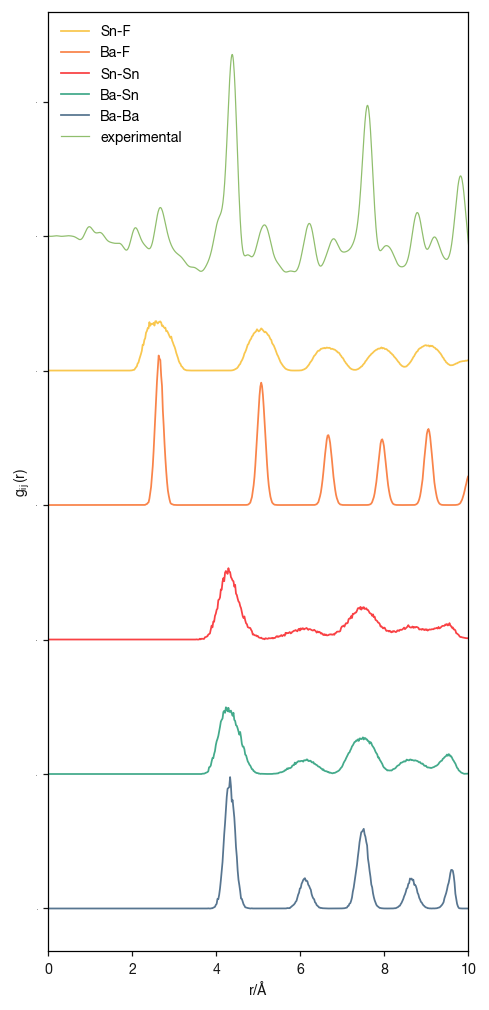

In [4]:
plt.figure(figsize=(4,8))

rdf_baba=np.loadtxt('STATIC_rdf_baba')
rdf_snsn=np.loadtxt('STATIC_rdf_snsn')
rdf_basn=np.loadtxt('STATIC_rdf_basn')
rdf_snf=np.loadtxt('STATIC_rdf_snf')
rdf_baf=np.loadtxt('STATIC_rdf_baf')
plt.plot(rdf_snf[0,:], rdf_snf[1,:]+40, label='Sn-F',c='#F9C74F',linewidth=1)
plt.plot(rdf_baf[0,:], rdf_baf[1,:]+30, label='Ba-F',c='#F9844A',linewidth=1)

plt.plot(rdf_snsn[0,:], rdf_snsn[1,:]+20, label='Sn-Sn',c='#F94144',linewidth=1)
plt.plot(rdf_basn[0,:], rdf_basn[1,:]+10, label='Ba-Sn',c='#43AA8B',linewidth=1)
plt.plot(rdf_baba[0,:], rdf_baba[1,:], label='Ba-Ba',c='#577590',linewidth=1)
PDF=np.loadtxt('d250_DD-20Apr2021_08-000000_tif_A0.gr',skiprows=27)
plt.plot(PDF[:,0],PDF[:,1]*5+50,c='#90BE6D',label='experimental')
plt.legend()

plt.xlim(0,10)
plt.xlabel(r'$r/ \operatorname{\AA}$')
plt.ylabel(r'$g_{\operatorname{ij}}(r)$')
plt.tight_layout()
plt.tick_params(labelsize=0,axis='y')

plt.savefig('STATICallrdf.pdf')